In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pokemon = pd.read_csv('pokemon_reduced.csv')

In [2]:
pokemon.head()

,Number,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
pokemon = pokemon.set_index("Name")
pokemon.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon.index = pokemon.index.str.replace(".*(?=Mega)", "")
pokemon.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemon.shape

(800, 12)

In [6]:
pokemon.Generation.count()

800

In [7]:
pokemon.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [8]:
pokemon.describe().round(1)

,Number,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,362.8,435.1,69.3,79.0,73.8,72.8,71.9,68.3,3.3
std,208.3,120.0,25.5,32.5,31.2,32.7,27.8,29.1,1.7
min,1.0,180.0,1.0,5.0,5.0,10.0,20.0,5.0,1.0
25%,184.8,330.0,50.0,55.0,50.0,49.8,50.0,45.0,2.0
50%,364.5,450.0,65.0,75.0,70.0,65.0,70.0,65.0,3.0
75%,539.2,515.0,80.0,100.0,90.0,95.0,90.0,90.0,5.0
max,721.0,780.0,255.0,190.0,230.0,194.0,230.0,180.0,6.0


In [9]:
def get_number_of_types(col):
    type_2_value = col[2]
    number_of_types = 'Dual'
    
    if (pd.isnull(type_2_value)):
        number_of_types = 'Single'
        
    return number_of_types

In [10]:
pokemon['Types'] = pokemon.apply(get_number_of_types, axis=1)

In [11]:
pokemon.head(n=10)

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Types
Name,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False,Dual
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False,Dual
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False,Dual
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False,Dual
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False,Single
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False,Single
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False,Dual
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False,Dual
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False,Dual


In [12]:
gen_1 = pokemon[pokemon.Generation==1]
gen_2 = pokemon[pokemon.Generation==2]
gen_3 = pokemon[pokemon.Generation==3]
gen_4 = pokemon[pokemon.Generation==4]
gen_5 = pokemon[pokemon.Generation==5]
gen_6 = pokemon[pokemon.Generation==6]

In [13]:
gen_1_dual = gen_1[gen_1.Types=='Dual']
gen_1_single = gen_1[gen_1.Types=='Single']

In [14]:
gen_1_single_percentage = (gen_1_dual['Number'].count() / gen_1['Number'].count()) * 100

In [15]:
gen_1_dual_percentage = (gen_1_single['Number'].count() / gen_1['Number'].count()) * 100

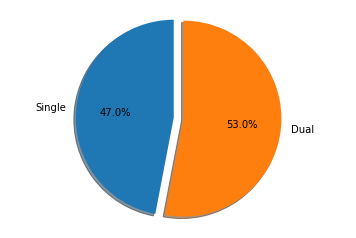

In [16]:
labels = 'Single', 'Dual'
sizes = [gen_1_single_percentage, gen_1_dual_percentage]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [17]:
type_of_pokemons = gen_1['Type 1'].value_counts().reset_index()

type_of_pokemons['Type Percentage'] = (type_of_pokemons['Type 1'] /
                                       type_of_pokemons['Type 1'].sum()) * 100

In [18]:
type_of_pokemons

,index,Type 1,Type Percentage
0,Water,31,18.674699
1,Normal,24,14.457831
2,Fire,14,8.433735
3,Bug,14,8.433735
4,Poison,14,8.433735
5,Grass,13,7.831325
6,Psychic,11,6.626506
7,Rock,10,6.024096
8,Electric,9,5.421687
9,Ground,8,4.819277


In [19]:
def classify_pokemon(col):
    pokemon_type = col[0]
    
    if col[2] < 4.0:
        pokemon_type = 'Other'
        
    return pokemon_type

In [20]:
type_of_pokemons['Type'] =  type_of_pokemons.apply(classify_pokemon, axis=1)
type_of_pokemons

,index,Type 1,Type Percentage,Type
0,Water,31,18.674699,Water
1,Normal,24,14.457831,Normal
2,Fire,14,8.433735,Fire
3,Bug,14,8.433735,Bug
4,Poison,14,8.433735,Poison
5,Grass,13,7.831325,Grass
6,Psychic,11,6.626506,Psychic
7,Rock,10,6.024096,Rock
8,Electric,9,5.421687,Electric
9,Ground,8,4.819277,Ground


In [21]:
new_type_of_pokemons_series = type_of_pokemons.groupby('Type').sum()
labels_for_types = new_type_of_pokemons_series.reset_index().Type.tolist()
sizes = new_type_of_pokemons_series['Type Percentage'].tolist()

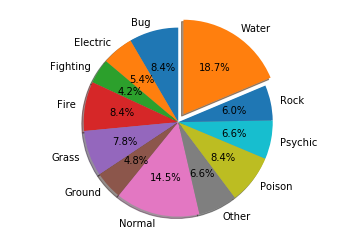

In [22]:
explode = (0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels_for_types, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Text(0.5,0,'Observations')

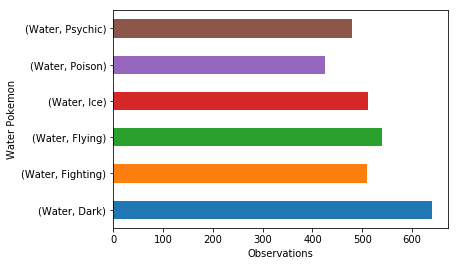

In [23]:
water_plus_type2_pokemons = gen_1_dual[gen_1_dual['Type 1']=='Water'].groupby(['Type 1','Type 2']) 
water_plus_type2_pokemons['Total'].mean().plot(kind='barh')
plt.subplots_adjust(hspace=10)
plt.ylabel("Water Pokemon")
plt.xlabel("Observations")

Text(0,0.5,'Observations')

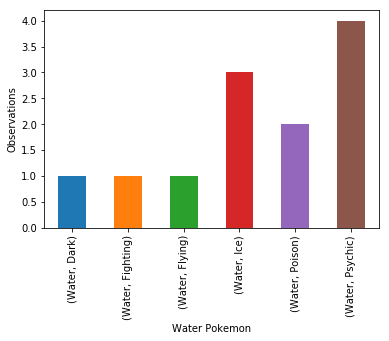

In [24]:
water_plus_type2_pokemons['Total'].count().plot(kind='bar')
plt.xlabel("Water Pokemon")
plt.ylabel("Observations")

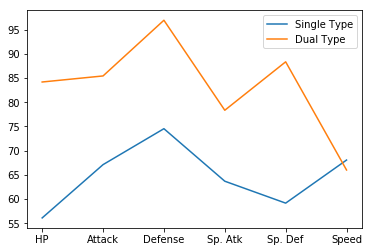

In [25]:
water_type_pokemons = gen_1_single[gen_1_single['Type 1']=='Water'].mean()
water_type_pokemons.drop(labels=['Number', 'Total', 'Generation', 'Legendary', 'Type 2'], inplace=True)

water_dual_type_pokemons = gen_1_dual[gen_1_dual['Type 1']=='Water'].mean()
water_dual_type_pokemons.drop(labels=['Number', 'Total', 'Generation', 'Legendary'], inplace=True)

my_xticks = ['HP','Attack','Defense','Sp. Atck', 'Sp. Def', 'Speed']
plt.xticks([0,1,2,3,4,5], my_xticks)

water_type_pokemons.plot(kind='line', label='Single Type')
water_dual_type_pokemons.plot(kind='line', label='Dual Type')
plt.legend()

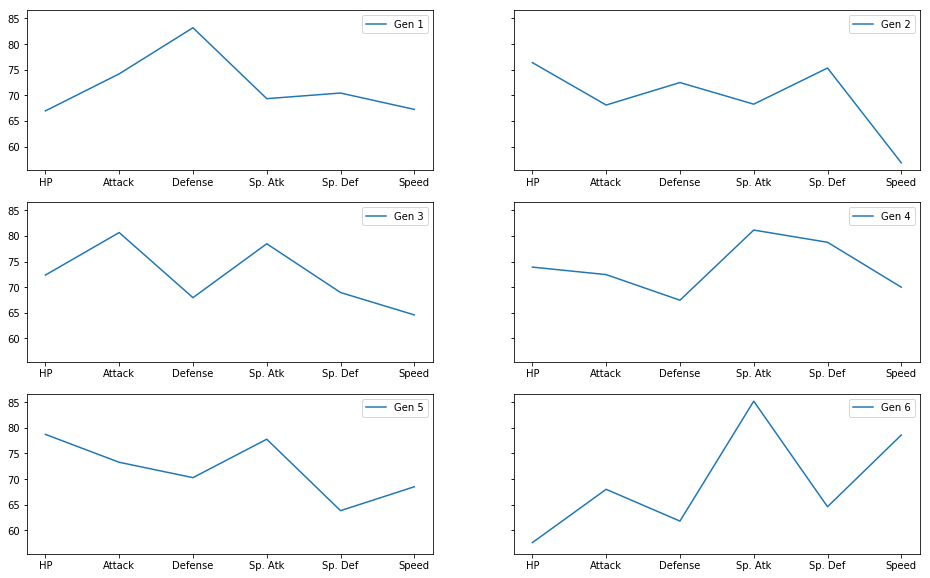

In [26]:
water_type_gen_1 = gen_1[gen_1['Type 1']=='Water'].mean()
water_type_gen_1.drop(labels=['Number', 'Total', 'Generation', 'Legendary'], inplace=True)

water_type_gen_2 = gen_2[gen_2['Type 1']=='Water'].mean()
water_type_gen_2.drop(labels=['Number', 'Total', 'Generation', 'Legendary'], inplace=True)

water_type_gen_3 = gen_3[gen_3['Type 1']=='Water'].mean()
water_type_gen_3.drop(labels=['Number','Total','Generation','Legendary'], inplace=True)

water_type_gen_4 = gen_4[gen_4['Type 1']=='Water'].mean()
water_type_gen_4.drop(labels=['Number','Total','Generation','Legendary'], inplace=True)

water_type_gen_5 = gen_5[gen_5['Type 1']=='Water'].mean()
water_type_gen_5.drop(labels=['Number','Total','Generation','Legendary'], inplace=True)

water_type_gen_6 = gen_6[gen_6['Type 1']=='Water'].mean()
water_type_gen_6.drop(labels=['Number','Total','Generation','Legendary'], inplace=True)

my_xticks = ['HP','Attack','Defense','Sp. Atck', 'Sp. Def', 'Speed']

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(321)
plt.xticks([0,1,2,3,4,5], my_xticks)
water_type_gen_1.plot(kind='line', label='Gen 1')
plt.legend()

ax2 = fig.add_subplot(322, sharey=ax1)
plt.xticks([0,1,2,3,4,5], my_xticks)
water_type_gen_2.plot(kind='line', label='Gen 2')
plt.legend()

ax3 = fig.add_subplot(323,sharey=ax1)
plt.xticks([0,1,2,3,4,5], my_xticks)
water_type_gen_3.plot(kind='line', label='Gen 3')
plt.legend()

ax4 = fig.add_subplot(324,sharey=ax1)
plt.xticks([0,1,2,3,4,5], my_xticks)
water_type_gen_4.plot(kind='line', label='Gen 4')
plt.legend()

ax5 = fig.add_subplot(325,sharey=ax1)
plt.xticks([0,1,2,3,4,5], my_xticks)
water_type_gen_5.plot(kind='line', label='Gen 5')
plt.legend()

ax6 = fig.add_subplot(326,sharey=ax1)
plt.xticks([0,1,2,3,4,5], my_xticks)
water_type_gen_6.plot(kind='line', label='Gen 6')
plt.legend()

In [28]:
types_of_pokemon = gen_1['Type 1'].value_counts().index
type_data = {}

In [56]:
def best_attribute_for_type(types_of_pokemon):
    for pokemon_type in types_of_pokemon:
        pokemon_type_data = gen_1[gen_1['Type 1'] == pokemon_type].mean();
        pokemon_type_data.drop(labels=['Number', 'Total', 'Generation', 'Legendary'], inplace=True);
        pokemon_type_data.sort_values(ascending=False, inplace=True);
        type_data[pokemon_type] = pokemon_type_data.index[0];
        
    return type_data;

In [57]:
type_data = best_attribute_for_type(types_of_pokemon)

In [51]:
def best_attribute(pokemon_type):
    return type_data.get(pokemon_type)

In [62]:
gen_1.is_copy = False
gen_1['Best Attribute'] = gen_1['Type 1'].apply(best_attribute)

In [63]:
gen_1.head()

,Number,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Types,BestAttribute,Best Attribute
Name,,,,,,,,,,,,,,,
Bulbasaur,1.0,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0,Dual,Sp. Atk,Sp. Atk
Ivysaur,2.0,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0,Dual,Sp. Atk,Sp. Atk
Venusaur,3.0,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0,Dual,Sp. Atk,Sp. Atk
Mega Venusaur,3.0,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,0.0,Dual,Sp. Atk,Sp. Atk
Charmander,4.0,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0,1.0,0.0,Single,Sp. Atk,Sp. Atk


In [65]:
attribute_by_type = gen_1.groupby(['Type 1'])['Best Attribute'].value_counts()
attribute_by_type

Type 1    Best Attribute
Bug       Attack            14
Dragon    Attack             3
Electric  Speed              9
Fairy     HP                 2
Fighting  Attack             7
Fire      Sp. Atk           14
Ghost     Sp. Atk            4
Grass     Sp. Atk           13
Ground    Defense            8
Ice       Sp. Def            2
Normal    HP                24
Poison    Attack            14
Psychic   Sp. Atk           11
Rock      Defense           10
Water     Defense           31
Name: Best Attribute, dtype: int64